## Coronavirus Data Analysis (612 Lesson 3)
#### Dataset: https://github.com/CSSEGISandData/COVID-19
#### Kai Fergerstrom

In [76]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

### 1) Parse and prepare the dataset

In [78]:
folder = "csse_covid_19_daily_reports"

df = pd.DataFrame()

columns = ["Country_Region", "Confirmed", "Deaths", "Recovered"]

for filename in os.listdir(folder):
    if filename.split(".")[1] == "csv":
        day = pd.read_csv(folder + "/" + filename)
        day = day.rename(columns={'Country/Region':"Country_Region"})
        day = day[columns]
        day['Date'] = filename.split(".")[0]
        df = df.append(day, ignore_index=True)
        
df = df.fillna(0)
df

,Country_Region,Confirmed,Deaths,Recovered,Date
0,Mainland China,1.0,0.0,0.0,01-22-2020
1,Mainland China,14.0,0.0,0.0,01-22-2020
2,Mainland China,6.0,0.0,0.0,01-22-2020
3,Mainland China,1.0,0.0,0.0,01-22-2020
4,Mainland China,0.0,0.0,0.0,01-22-2020
...,...,...,...,...,...
89458,West Bank and Gaza,402.0,2.0,69.0,04-17-2020
89459,Western Sahara,6.0,0.0,0.0,04-17-2020
89460,Yemen,1.0,0.0,0.0,04-17-2020
89461,Zambia,52.0,2.0,30.0,04-17-2020


In [79]:
countries = df['Country_Region'].unique()
countries[:5]

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US'],
      dtype=object)

### 2) Determine which countries to analyze
This graph tracks the total confirmed cases for each day. This dosen't tell much about tracking the US becuase:
- They are not on the same time scale
- China has had cases much longer than other countries
- The scale of the US is much larger than other nations

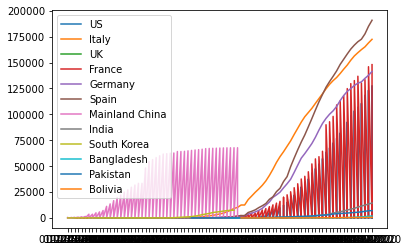

In [80]:
countries = ["US", "Italy", "UK", "France", "Germany", "Spain", "Mainland China", "India", "South Korea", "Bangladesh", "Pakistan", "Bolivia"]

for country in countries:
    c = df[df['Country_Region'] == country]
    plt.plot(c['Date'], c['Confirmed'], label=country)
    
plt.legend()
plt.show()

### 3) Track days since patient zero
Instead of comparing date versus cases, it is better to put the data on the same time scale, and plot days since patient zero to accurately compare nations like China, Italy, and the US. This chunk also combines the data from each province into one singular dataset under the country.

In [81]:

combined = pd.DataFrame()

for country in countries:
    c = df[df['Country_Region'] == country]
    dates = df['Date'].unique()
    for index, date in enumerate(dates):
        day = c[c['Date'] == date]
        confirmed_sum = sum(day['Confirmed'])
        death_sum = sum(day['Deaths'])
        recovered_sum = sum(day['Recovered'])
        new_row = {'Country':country, 'Date':date, 'Confirmed':confirmed_sum, 'Deaths':death_sum, 'Recovered':recovered_sum, 'Days Since Start': index}
        combined = combined.append(new_row, ignore_index=True)

combined

,Confirmed,Country,Date,Days Since Start,Deaths,Recovered
0,1.0,US,01-22-2020,0.0,0.0,0.0
1,1.0,US,01-23-2020,1.0,0.0,0.0
2,2.0,US,01-24-2020,2.0,0.0,0.0
3,2.0,US,01-25-2020,3.0,0.0,0.0
4,5.0,US,01-26-2020,4.0,0.0,0.0
...,...,...,...,...,...,...
1039,330.0,Bolivia,04-13-2020,82.0,27.0,2.0
1040,354.0,Bolivia,04-14-2020,83.0,28.0,6.0
1041,397.0,Bolivia,04-15-2020,84.0,28.0,7.0
1042,441.0,Bolivia,04-16-2020,85.0,29.0,14.0


### 4) Plot days since patient zero vs the confirmed cases
This graph shows a little more on the severity of the cases in US; however, the US is a much larger country than others which scews the data scale in the y direction. Instead we should plot the delta of confirmed cases.

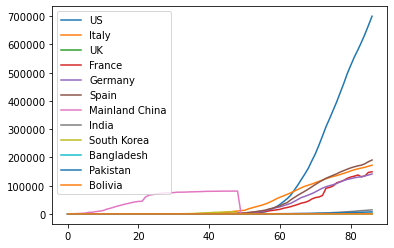

In [82]:
for country in countries:
    c = combined[combined['Country'] == country]
    plt.plot(c['Days Since Start'], c['Confirmed'], label=country)
    
plt.legend()
plt.show()

### 5) Calculate deltas for confirmed cases, deaths, and recoveries
Calculating the change in cases for each country over the time since patient zero reveals a lot more about the rate that the virus is spreading.

In [83]:
# Add the change in cases to the dataset
combined['New Cases'] = combined['Confirmed'] - combined['Confirmed'].shift(1)
combined['New Deaths'] = combined['Deaths'] - combined['Deaths'].shift(1)
combined['New Recovered'] = combined['Recovered'] - combined['Recovered'].shift(1)

combined = combined.fillna(0)  # Fill the NaN columns

# Set first value of dataset to zero since it returns negative
combined[combined['New Cases'] < 0] = 0
combined[combined['New Deaths'] < 0] = 0
combined[combined['New Recovered'] < 0] = 0

### 6) Plot days since patient zero vs the new cases per day
This reveals a lot more about the speed at which the virus is spreading the US, and that flattening the curve may take longer and be more costly than predicted.

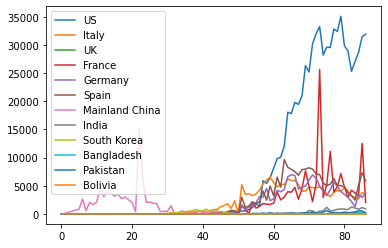

In [84]:
for country in countries:
    c = combined[combined['Country'] == country]
    plt.plot(c['Days Since Start'], c['New Cases'], label=country)
    
plt.legend()
plt.show()

### 7) Plot days since patient zero vs the new deaths per day
This shows how the US is still averaging a high amount of deaths despite more pushes to social distance, and how other countries like italy have seen a decline in a daily deaths.

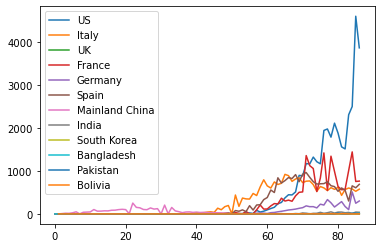

In [85]:
for country in countries:
    c = combined[combined['Country'] == country]
    plt.plot(c['Days Since Start'], c['New Deaths'], label=country)
    
plt.legend()
plt.show()

### 8) Plot days since patient zero vs the new recoveries per day
This shows the relative speed of health care in treating cases for the virus. the US and Germany have seen the highest peaks of recoveries per day

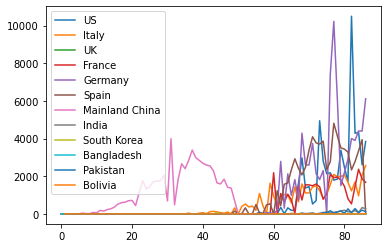

In [86]:
for country in countries:
    c = combined[combined['Country'] == country]
    plt.plot(c['Days Since Start'], c['New Recovered'], label=country)
    
plt.legend()
plt.show()